<a href="https://colab.research.google.com/github/ManuelDizen/SIA/blob/main/Ej_Obligatorio%201/Ej1-Gradientes_Conjugados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Gradientes conjugados:
------------------------
Tiempo de ejecución: 0.03926825523376465s

Resultados:

	-- 0 --
W = [6.14978292 7.12182304 7.12182304]
w = [-2.7609107   0.53929392  2.34593696]
	 [-2.7609107   0.53929392  2.34593696]
w0 = [0.06283707 0.06283707]
Error: 4.720788338621333e-06


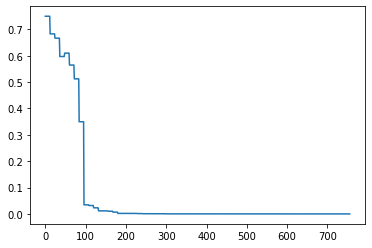

	-- 0 --

Gradientes descendientes:
------------------------
Tiempo de ejecución: 0.07281208038330078s

Resultados:

	-- 0 --
W = [-0.19007274  0.11172825  0.11172825]
w = [-0.04172437 -0.00212258  0.03554512]
	 [-0.04172437 -0.00212258  0.03554512]
w0 = [-0.00234701 -0.00234701]
Error: 0.6801816128501842


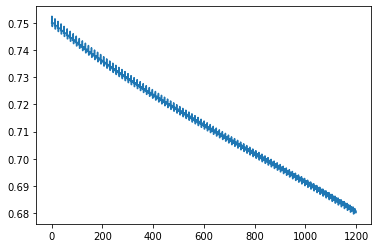

	-- 0 --

ADAM:
------------------------
Tiempo de ejecución: 4.852167129516602s

Resultados:

	-- 0 --
W = [8.09964426 8.48563852 8.48563852]
w = [-2.28487535 -0.6168037   2.19640554]
	 [-2.28487535 -0.6168037   2.19640554]
w0 = [0.75230605 0.75230605]
Error: 1.3151039987953922e-07


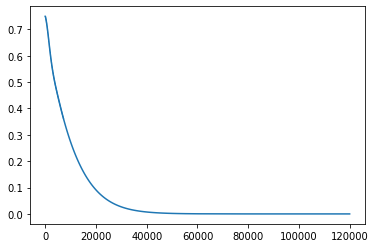

	-- 0 --


In [ ]:
!pip install qiskit
from qiskit import algorithms
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import random

training_set = [[4.4793, -4.0765, -4.0765], [-4.1793, -4.9218, 1.7664], [-3.9429, -0.7689, 4.8830]]
output = [0, 1, 1]

partial_errors = []


def g(x):
  return math.exp(x) / (1 + math.exp(x))

def F(W, w, w0, mu):
  outerSum = 0
  innerSum = 0
  # Chequear los índices de los arreglos
  for j in range(0,2):
    for k in range(0,3):
      innerSum += w[j][k]*mu[k]
    outerSum += W[j+1]*g(innerSum - w0[j])
    innerSum = 0
  return g(outerSum - W[0])

def error(W, w, w0):
  sum = 0
  for i in range(0,3):
    sum += ((output[i] - F(W, w, w0, training_set[i])) ** 2)
  partial_errors.append(sum)
  return sum

def aux (arr):
  W = [arr[i] for i in range(0,3)]
  w = [[], []]
  w[0] = [arr[i] for i in range(3,6)]
  w[1] = [arr[i] for i in range(6,9)]
  w0 = [arr[i] for i in range(9,11)]
  return error(W, w, w0)

def restart():
  return np.zeros(11)


def print_result(w):
    auxi = w[0]
    print("\t-- 0 --")
    print("W = " + str(auxi[0:3]))
    print("w = " + str(auxi[3:6]) + "\n\t " + str(auxi[6:9]))
    print("w0 = " + str(auxi[9:11]))
    print("Error: " + str(w[1]))
    plt.plot(partial_errors)
    plt.show()
    print("\t-- 0 --")


print("\nGradientes conjugados:\n------------------------")
partial_errors = []
x0 = restart()
t0 = time.time()
out = algorithms.optimizers.CG().optimize(11, aux, initial_point=x0)
tf = time.time()
print(f'Tiempo de ejecución: {(tf-t0)}s')
print('\nResultados:\n')
print_result(out)

print("\nGradientes descendientes:\n------------------------")
partial_errors = []
x0 = restart()
t0 = time.time()
out = algorithms.optimizers.GradientDescent().optimize(11, aux, initial_point=x0)
tf = time.time()
print(f'Tiempo de ejecución: {(tf-t0)}s')
print('\nResultados:\n')
print_result(out)


print("\nADAM:\n------------------------")
partial_errors = []
x0 = restart()
t0 = time.time()
out = algorithms.optimizers.ADAM().optimize(11, aux, initial_point=x0)
tf = time.time()
print(f'Tiempo de ejecución: {(tf-t0)}s')
print('\nResultados:\n')
print_result(out)
